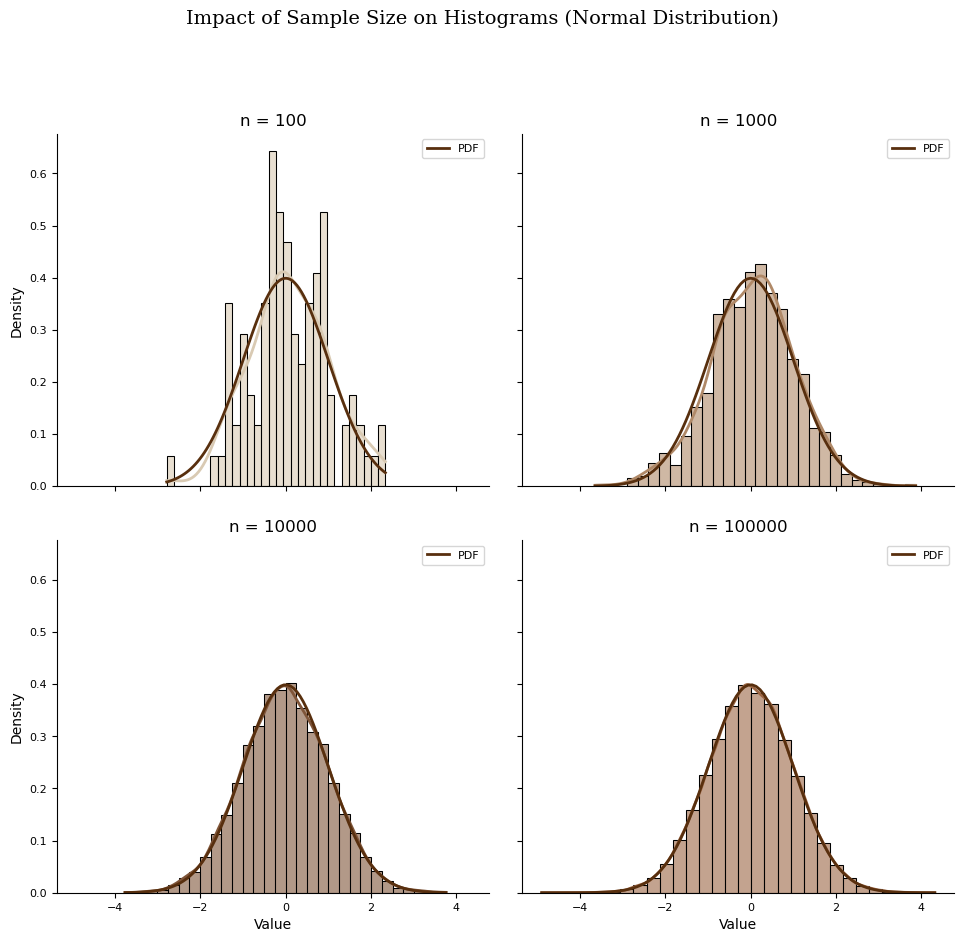

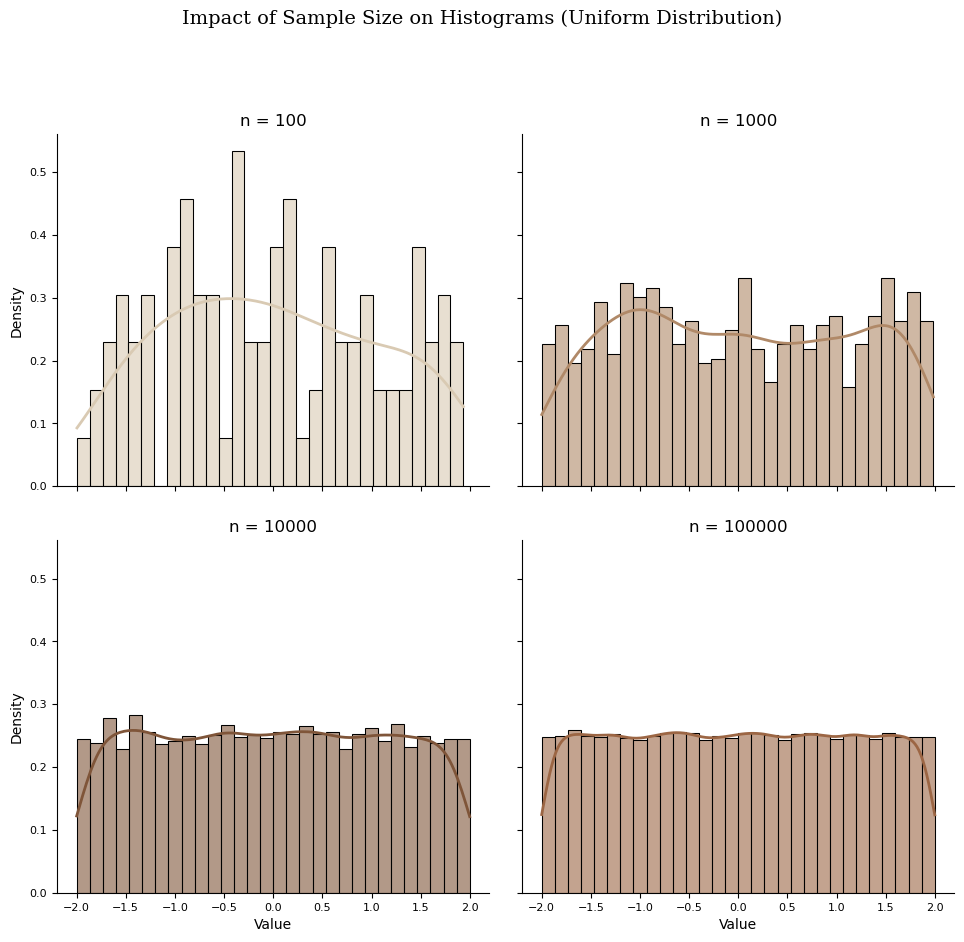

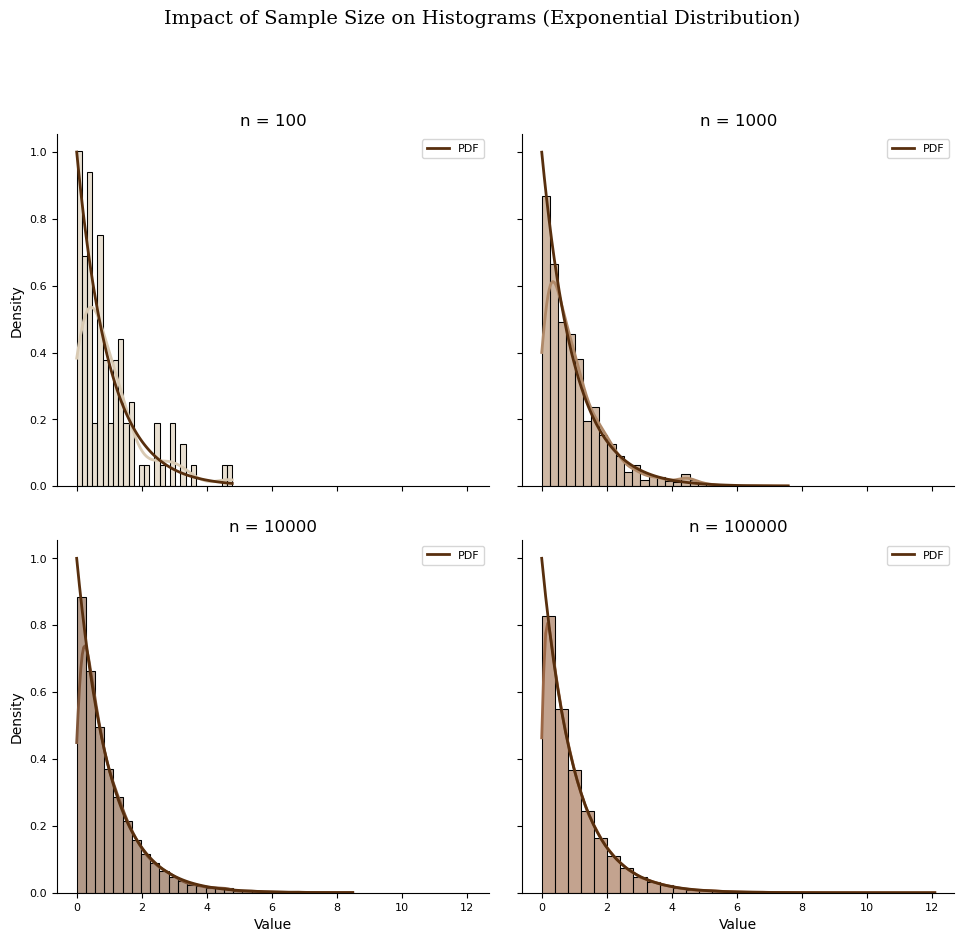

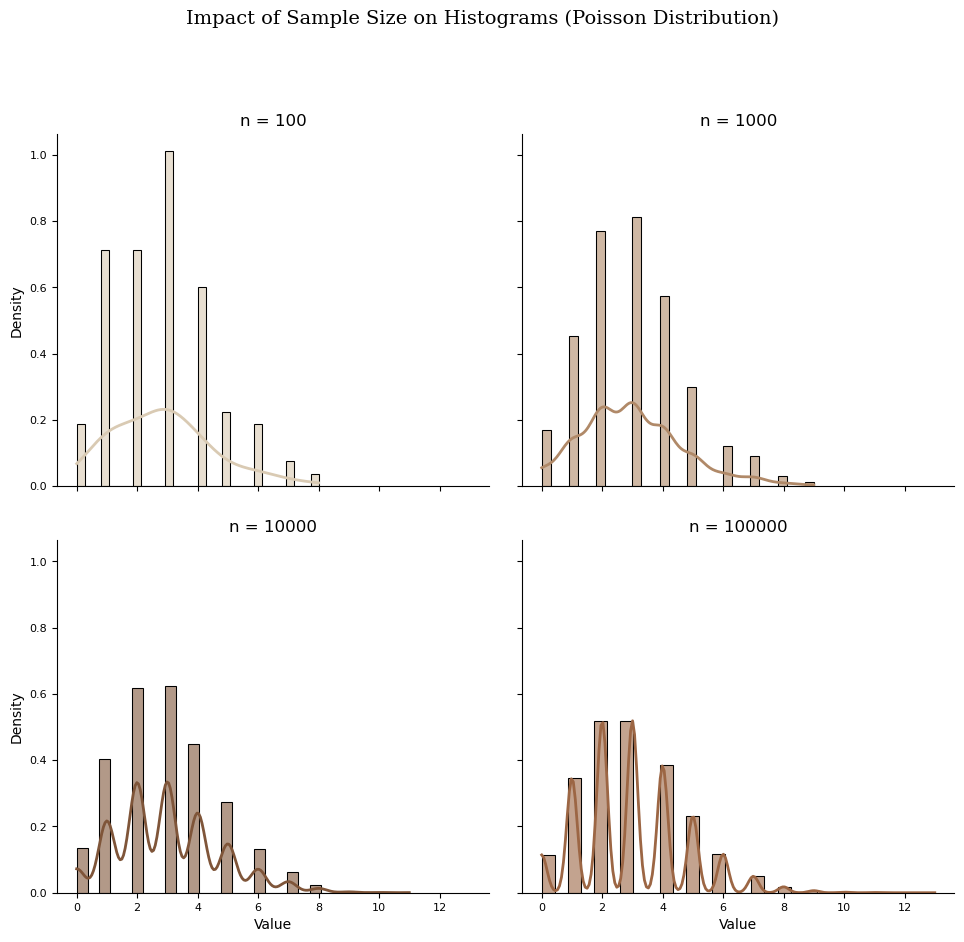

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, expon  # Import expon for exponential distribution

# Define sample sizes and vintage color palette
sample_sizes = [100, 1000, 10000, 100000]
vintage_palette = ["#d9cab3", "#b08968", "#7f5539", "#9c6644"]

# Define distributions and their PDF functions (if available)
distributions = {
    "Normal": (lambda n: np.random.normal(0, 1, n), lambda x: norm.pdf(x, 0, 1)),
    "Uniform": (lambda n: np.random.uniform(-2, 2, n), None),  # No simple PDF for uniform in this range
    "Exponential": (lambda n: np.random.exponential(1, n), lambda x: expon.pdf(x, scale=1)), #Scale is the inverse of lambda
    "Poisson": (lambda n: np.random.poisson(3, n), None), #Lambda of 3
}

for dist_name, (dist_func, pdf_func) in distributions.items():
    n_subplots = len(sample_sizes)
    n_cols = int(np.ceil(np.sqrt(n_subplots)))
    n_rows = int(np.ceil(n_subplots / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows), sharex=True, sharey=True)
    axes = axes.ravel()

    for i, n in enumerate(sample_sizes):
        data = dist_func(n)

        sns.histplot(data, bins=30, ax=axes[i], stat="density", kde=True, color=vintage_palette[i], alpha=0.6,
                     line_kws=dict(linewidth=2))
        axes[i].set_title(f"n = {n}", fontsize=12)
        axes[i].set_xlabel("Value", fontsize=10)
        axes[i].set_ylabel("Density", fontsize=10)
        axes[i].spines['top'].set_visible(False)
        axes[i].spines['right'].set_visible(False)
        axes[i].tick_params(axis='both', which='major', labelsize=8)

        if pdf_func is not None:  # Check if a PDF function is available
            x = np.linspace(data.min(), data.max(), 100)
            p = pdf_func(x)
            axes[i].plot(x, p, '#582f0e', linewidth=2, label="PDF")
            axes[i].legend(fontsize=8)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f"Impact of Sample Size on Histograms ({dist_name} Distribution)", fontsize=14, fontname="serif")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95], pad=2.0)
    plt.show()

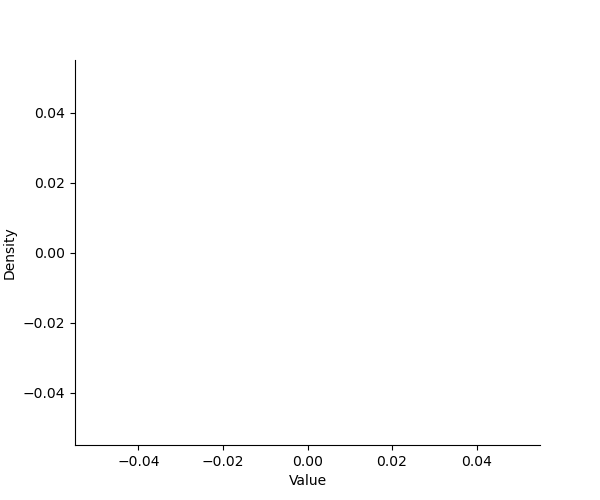

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import matplotlib.animation as animation
%matplotlib widget

# Define sample sizes (more granular for smoother animation)
sample_sizes = np.linspace(100, 10000, 50, dtype=int)  # 50 frames

# Define vintage color palette (using a single color for animation simplicity)
vintage_color = "#b08968"

# Define the Normal distribution and its PDF function
dist_func = lambda n: np.random.normal(0, 1, n)
pdf_func = lambda x: norm.pdf(x, 0, 1)

# Create the figure for plotting
fig, ax = plt.subplots(figsize=(6, 5))
ax.set_xlabel("Value", fontsize=10)
ax.set_ylabel("Density", fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Initialize line for PDF plot
line, = ax.plot([], [], '#582f0e', linewidth=2, label="PDF")

# For managing the histogram patches
hist = None

def animate(i):
    global hist
    n = sample_sizes[i]
    data = dist_func(n)

    if hist is not None:
        # Remove the previous histogram if it exists
        for patch in hist.patches:
            patch.remove()

    # Draw the histogram with KDE
    hist = sns.histplot(data, bins=30, ax=ax, stat="density", kde=True, color=vintage_color, alpha=0.6,
                        line_kws=dict(linewidth=2))
    
    ax.set_title(f"Impact of Sample Size on Histograms (Normal Distribution), n = {n}", fontsize=12)

    # Plot the PDF of the Normal distribution
    x = np.linspace(data.min(), data.max(), 100)
    p = pdf_func(x)
    line.set_data(x, p)
    
    # Adjust axis limits
    ax.relim()
    ax.autoscale_view()

    if not ax.legend_:
        ax.legend()

    return hist.patches + [line]  # Return both patches and line for updating

# Initialize the animation
ani = animation.FuncAnimation(fig, animate, frames=len(sample_sizes), interval=100, blit=True, repeat_delay=1000)

# Display the animation interactively
plt.show()
